# Given

The training dataset of three examples and four features (size, bedrooms, floors and, age) shown in the table below:

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  


# Find

A linear regression model, so you can then predict the price for a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.

<b>*Ignore feature scaling in this task</b>

# Solution

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.array([[2104,5,1,45],[1416,3,2,40],[852,2,1,35]])
y = np.array([460,232,178])

m = x.shape[0]
k = x.shape[1]

# Solution

Examples are stored in a matrix (m rows, n columns):

$$\mathbf{X} = 
\begin{pmatrix}
 x_0^0 & x_0^1 & \cdots & x_0^{n-1} \\ 
 x_1^0 & x_1^1 & \cdots & x_1^{n-1} \\
 \cdots \\
 x_{m-1}^0 & x_{m-1}^1 & \cdots & x_{m-1}^{n-1}
\end{pmatrix}
$$

$\mathbf{w}$ is a vector with $n$ elements:

$$\mathbf{w} = \begin{pmatrix}
w_0 & w_1 & \cdots & w_{n-1}
\end{pmatrix}
$$
$b$ is a scalar parameter.  

The model's prediction in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$


### Define Loss and Cost functions

$$Loss_i(w,b) = f_{w,b}(x_{i}) - y_{i}$$
$$J(w,b) = \frac{1}{2m}\sum\limits^{m} Loss_i(w,b)^2$$

In [4]:
def CalculateLoss(w, b):
    
    loss = np.dot(x, w) + b - y
    cost = np.sum(loss**2) / 2 / m
    
    return loss, cost

### Calculate gradient vectors

$$\frac{\partial J(\mathbf{w},b)}{\partial w^j}  = \frac{1}{m} \sum\limits^{m} Loss_{i}(w^j,b) \cdot x_{i}^{j}$$
$$\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits^{m} Loss_{i}(w,b)$$

In [5]:
def CalculateGradient(w, b):
    
    loss, cost = CalculateLoss(w, b)

    dJ_dw = np.dot(loss, x) / m
    dJ_db = np.sum(loss) / m

    return dJ_dw, dJ_db, cost

### Run GD

In [6]:
def GD(iterations = 1000, alpha = 5.0e-9):

    # initial w & b

    w = np.zeros_like(x[0])
    b = 0

    # GD
    log = []

    i = 0

    while i < iterations:

        dJ_dw, dJ_db, cost = CalculateGradient(w, b)

        log.append([i, w, b, cost, dJ_dw, dJ_db])

        w = w - alpha * dJ_dw
        b = b - alpha * dJ_db

        i += 1

    log = np.array(log, dtype="object")

    return w, b, log

# Answer

### Model

In [7]:
w, b, log = GD()

print(f"Multiple Linear regression: y = x * {w.astype("float")} + {b}")

Multiple Linear regression: y = x * [2.02183456e-01 4.98188783e-04 4.85538721e-05 4.39074080e-03] + 9.93445650863749e-05


### Prediction

In [8]:
# 1200 sqft, 3 bedrooms, 1 floor, 40 years old.
prediction = np.array([1200, 3, 1, 40])
price = np.dot(prediction, w) + b

print (f"1200 sqft, 3 bedrooms, 1 floor, 40 years old will cost {price}")

1200 sqft, 3 bedrooms, 1 floor, 40 years old will cost 242.79741940772269


### Precision

In [9]:
print(f"Final sq error is still high without feature scaling: {log[-1,3]}")

Final sq error is still high without feature scaling: 696.9719764219686


### Convergence

Text(0, 0.5, 'Cost')

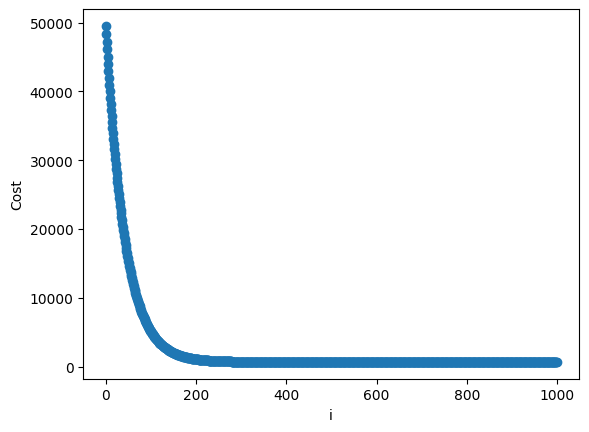

In [10]:
fig, ax = plt.subplots()
ax.scatter(log[:,0], log[:,3])
ax.set_xlabel("i")
ax.set_ylabel("Cost")